Interpretation For the First Video: 
[The spelled-out intro to neural networks and backpropagation: building micrograd](https://youtu.be/VMj-3S1tku0?si=8FQ4c7gDBBAXCdci)

This notebook has been created upon the suggestion by Neil sir to go through the Andrej Kaparthy video regarding Neural Networks.

Let's Title this notebook as:

# __BUILDING MICROGRAD__ 
_as it fits the video..._

# __Index:__
- [Takeaways](#takeaways)
- [Micrograd Overview](#micrograd)
    - [Explanation by an Example](#Example)

### __Takeaways__:
By the end of this Lecture, we will understand:

- The basic structure and purpose of neural networks.
- How to define and train a neural network using Micrograd.
- The step-by-step process of backpropagation and how it tunes weights.
- How an autograd engine works and its role in gradient calculation.
- Practical application and experimentation using Micrograd’s minimalistic approach.

### __Micrograd Overview__:
Micrograd is a small library that demonstrates how an automatic differentiation engine (autograd engine for short) works. It uses something called a computational graph (or expression graph) to keep track of operations between values. The main idea is to build this graph as you perform operations and then use [Backpropagation](#Backpropagation) to compute derivatives or gradients.
#### Example:

In [3]:
from micrograd.engine import Value
a = Value(-4.0)
b = Value(2.0)

Here, we create two Value objects: `a` with `-4.0` and `b` with `2.0`. These objects not only store their numerical values but also keep track of gradients and the operations they participate in.

In [4]:
c = a + b

The code `c = a + b` creates a Value object c that's the sum of `a` and `b`. This operation is stored in the computational graph, forming a simple graph with `c` dependent on `a` and `b`.

In [5]:
c += c + 1
c += 1 + c + (-a)

- `c += c + 1`: This statement updates the value of `c` by adding `c + 1` to it. The expression graph records `c`'s dependency on its previous value, another instance of itself, and the constant `1`.
- `c += 1 + c + (-a)`: This statement updates `c` by adding `1 + c + (-a)` to it. Now, `c` depends on the constant `1`, another instance of itself, and the negative of `a`. The computational graph continues to grow, with `c` linked to all these operations and values.

In [6]:
print(c.data) #output: -1.0

-1.0


The final value of `c` is `-1.0`, resulting from a sequence of additions and transformations involving `a` and `b`.

In [7]:
c.backward()

##### Backpropagation:
When you call `c.backward()`, Micrograd computes the gradients of `c` with respect to `a` and `b` by traversing the expression graph backwards. It applies the chain rule to determine how changes in `a` and `b` influence `c`. This is known as Backpropagation. Backpropagation is an algorithm used in neural networks to compute gradients. It works by propagating the error backward through the network, applying the chain rule to calculate the gradient of the loss function with respect to each weight. This enables the network to update weights and minimize the error, improving its performance during training.

In [8]:
print(a.grad) #output: 3.0
print(b.grad) #output: 4.0

3
4


As a result:

* **Gradient of `a` (`a.grad`)**: `3.0`
* **Gradient of `b` (`b.grad`)**: `4.0`

This means:
* A small change in `a` causes a change in `c` three times as large.
* A small change in `b` causes a change in `c` four times as large.

The expression graph tracks all dependencies, and backpropagation efficiently calculates these gradients. This process is fundamental in neural networks, allowing for weight updates during training to minimize loss. Backpropagation applies to many operations, including in Multi-Layered Perceptrons (MLPs), where inputs and weights interact through matrix operations. Starting from `c`, the gradient is computed by applying the chain rule recursively to all nodes in the expression graph influencing `c`.

Neural Network are just mathematical expressions that take input data and weights as the input and output data are your predictions or the loss functions. But in the case of Backpropagation it is more general and it doesn't care about the network what it cares about are just mathematical expressions. And we use this for training of neural networks.

So Micrograd is basically what we need to train neural networks and everything else is just efficiency(usage of n-dimensional tensors and memory allocation). So You think that it could be a very complex piece of code but that turns out to not to be the case where you see that it is just [barely 100 lines of code of simple python](https://github.com/karpathy/micrograd/blob/master/micrograd/engine.py)
##### __Installation__:
Run the following command in your shell:
`pip install micrograd`


### __Implementing Micrograd__:
##### Derivative Of a Simple Function with One Input:
Derivatives quantify how changes in an input affect the output, showing the rate of change of a function. In neural networks, partial derivatives reveal each input’s impact on the output, crucial for adjusting parameters and optimizing models. Again let's deep dive to understand this with an 
##### __Example__:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return x**2-x-6
f(3)
abscissae=np.arange(-5,5,0.25)

Set of Values of x from -5 to 5 in steps of 0.25 but not including 5

In [14]:
abscissae

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

After plotting those values we get a Parabola.

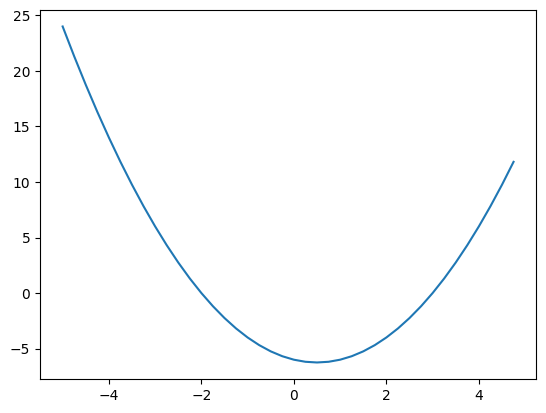

In [16]:
ordinates=f(abscissae)
plt.plot(abscissae,ordinates)

#### __Derivative of a Function__:
The Derivative shows how a function’s value changes with a small input change.
- If the function increases, the derivative is positive.
- If it decreases, the derivative is negative.
It indicates the direction and rate of change at that point.
So,
$$f'(x) = \lim_{{h \to 0}} \frac{{f(x + h)-f(x)}}{h}$$
Executing this we get:

In [18]:
h=0.001
x=2
(f(x+h)-f(x))/h

3.0009999999998094

In Deep Learning, frameworks use backpropagation to automatically compute derivatives. For example, for $ f(x)=x^2-x-6 $, the derivative is $f'(x)=2x-1$. At $x=2$, it equals $3$, which matches the code output. Automatic differentiation makes manual calculation unnecessary.